## Homework 1 - Supervised Learning

## Problem 1: Set up Github and clone assignment repo. 

**REMINDER ON HOW TO SUBMIT:**


- Go to http://www.github.com and create an account.
- Fill out this spreadsheet with your Github username and Columbia UNI https://docs.google.com/spreadsheets/d/1KEBDe8H0x_drnqx4ZeMyMUN-6-LrDVy2tBBJ97RZtMY/edit?usp=sharing

- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. **Make sure to install command line tools. **
- Click on this link: https://classroom.github.com/a/Xk990Gdv
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/apmae4990-hw-project-{your-git-username}```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!). **This is where you will store all of your homework and your final project. **


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ cd apmae4990-hw-project-{your-git-username} ```

``` $ git add myhomeworksolutions.ipynb ``` ( this adds your homework to the files to be pushed )

``` $ git status ``` ( this shows which files have been modified and will be part of the commit)

``` $ git commit -m "added my homework 1 solutions" ``` (commits the files for the push to the repo)

``` $ git push origin master $ ``` (pushes the files to the repo)

**Writing to the notebook:** To write code in this notebook, you can create a new cell directly below the problem. Either click `Insert -> Insert Cell Below` or type `CTRL-M` **then** `B`.


### Very important!!

Do not expect to understand every single import statement or piece of code when you first start. You should always think about what your goal is, and try to figure out how to do it yourself. However in many cases it is much easier to simply search stack overflow for the *right* way to do something. You are free to do this and do not need to include any references. This is largely how engineers and data scientists discover things in practice when they are unfamiliar with a topic. 


## Problem 2: Sales Data Analysis

In this problem we will explore our first dataset using `pandas` (for loading and procssing our data) and `sklearn` (for building machine learning models).

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import pylab as plt
import seaborn
import numpy.random as nprnd
import random
import numpy


%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features (variables, covariates, all mean the same thing)?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper
- **Sales:** Number of 1k units sold. 

**Goal:** Predict the amount of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the variable ranges.

**[5 points]** Use df.boxplot()

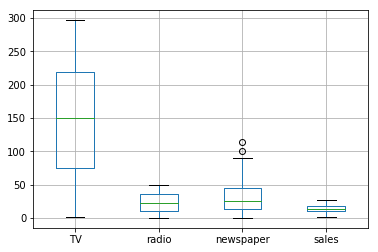

In [2]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using `pandas.plotting.scatter_matrix`

**[5 points]** Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b086908>,
      dtype=object)

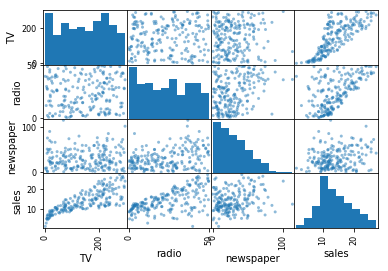

In [3]:
from pandas.tools.plotting import scatter_matrix 
pd.plotting.scatter_matrix(df)

Which of the variables seem correlated with one another? Which don't? Explain your answer. 

Why might these variables be correlated in intuitive terms?

Sales & TV, sales & radio are correlated to each other. We can see their graphs have clear trands, and there is no trand between other variables.

It's easy to think that the more you spend on advertisement, the more you can get(sales). TV and radio advertisements are effective, since people prefer TV and radio rather than newspaper. Also, people can simply ignore the advertisement part on newspaper, but they can't do it on TV or radio.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

**Note:** This example does not randomize the test/train split. So please ensure you've done this using `test_train_split`. 

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**[2 points]** a) Set y to be the sales in df

In [5]:
y=df.sales

**[2 points]** b) Set X to be just the features described above in df. Because we need to add an intercept in, also create a new column called `interecept` which is just 1. 

In [6]:
X=df.drop(['sales'], axis=1)
X['intercept']=1

**[5 points]** c) Randomly split data into training and testing - 80% training, 20% testing. Make sure your test/train split is random. 

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,train_size=0.8)
print(len(X_train),len(X_test))

160 40


In [22]:
X_train.head()

,TV,radio,newspaper,intercept
51,199.8,3.1,34.6,1
113,175.7,15.4,2.4,1
102,296.4,36.3,100.9,1
36,290.7,4.1,8.5,1
186,205.0,45.1,19.6,1


In [23]:
X_test.head()

,TV,radio,newspaper,intercept
127,7.8,38.9,50.6,1
15,204.1,32.9,46.0,1
18,281.4,39.6,55.8,1
125,229.5,32.3,74.2,1
79,5.4,29.9,9.4,1


**[5 points]** d) Train model on training data, and make predictions on testing data, using our solution from class

$$ \beta = (X^TX)^{-1}X^Ty.$$

It will be useful to use `np.linalg.inverse`. 

In [24]:
import numpy as np
beta=np.dot(np.linalg.inv(np.dot(X_train.transpose(),X_train)),np.dot(X_train.transpose(),y_train))
beta

array([ 0.04594429,  0.18886764, -0.00418433,  3.01097752])

In [25]:
np.dot(X_test,beta)

array([10.50456726, 18.40947439, 23.18537515, 19.34514078,  8.86688656,
       12.1565757 , 10.06328937, 24.79367553, 15.66917494, 19.06598568,
       10.45795868, 21.63225273, 15.56319448, 16.99688258, 21.72432441,
        8.85258986, 21.14917642, 12.00011181,  7.64129719,  7.63453454,
       13.99287401, 20.45340106, 15.58185406,  5.75718792, 18.9898798 ,
       15.38453283, 12.28928375, 18.22153143,  8.74935537,  6.83086858,
       18.04815785, 24.09590336, 19.09324109,  9.09516132, 23.69621791,
       19.88047072,  7.12392561, 15.05751665, 10.62382513, 19.46441006])

**[5 points]** d) Train model on training data, and make predictions on testing data, using `sklearn.linear_model.LinearRegression`. Make sure your answer matches part d).

In [26]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
predictions

array([10.50456726, 18.40947439, 23.18537515, 19.34514078,  8.86688656,
       12.1565757 , 10.06328937, 24.79367553, 15.66917494, 19.06598568,
       10.45795868, 21.63225273, 15.56319448, 16.99688258, 21.72432441,
        8.85258986, 21.14917642, 12.00011181,  7.64129719,  7.63453454,
       13.99287401, 20.45340106, 15.58185406,  5.75718792, 18.9898798 ,
       15.38453283, 12.28928375, 18.22153143,  8.74935537,  6.83086858,
       18.04815785, 24.09590336, 19.09324109,  9.09516132, 23.69621791,
       19.88047072,  7.12392561, 15.05751665, 10.62382513, 19.46441006])

**[5 points]** e) Evalute the R^2 on training data and testing data. Is this good? Bad? Why?

In [27]:
from sklearn.metrics import r2_score
R_sqr=r2_score(y_test,predictions)
R_sqr

0.9112783804658368

Based on our $R^2$ value, which is over 0.9, we can say our model is great. Also, it's not over 0.95, so we can rule out the overfitting problem in this case.

**[5 points]** g) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a *good* model?

Text(0, 0.5, 'Prediction based on Training data')

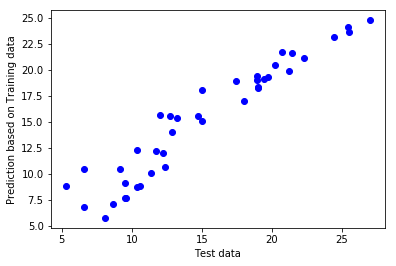

In [28]:
plt.plot(y_test,predictions,'bo')
plt.xlabel("Test data")
plt.ylabel("Prediction based on Training data")

Based on our model, it looks like a good model. We can see $x,y$ are highly positivly correlated with eachother with graident $1$, this means there are only small difference between prediction and real value, which indicats our model is good.

**[5 points]** f) Interpreting the coefficients of your model (`clf.coef_1`), which form of advertising appears to have the largest impact on sales? Which has the least impact?

In [29]:
lm.coef_

array([ 0.04594429,  0.18886764, -0.00418433,  0.        ])

Based on out coefficient output, the largest impact comes from the second column, which is radio. The least impact comes form the thrid column, which is newspaper.

**[10 points]** g) Plot the coefficients along with their confidence intervals, recalling that 

$$\beta \sim \mathcal{N}(\hat \beta, \hat \sigma^2(X^TX)^{-1}).$$

The variance of the coefficients are the diagonal elemements of the covariance matrix $\sigma^2(X^TX)^{-1}$, where $\hat \sigma$ is the estimated residuals. 

Ensure you obtain the same results for the variance of the coefficients as when you use:
```
import scipy, scipy.stats

result = sm.OLS( y, X ).fit()
result.summary()
```

In [30]:
import math
import matplotlib.mlab as mlab
cov_b1=np.linalg.inv(np.dot(X_train.transpose(),X_train))[0][0]
cov_b2=np.linalg.inv(np.dot(X_train.transpose(),X_train))[1][1]
cov_b3=np.linalg.inv(np.dot(X_train.transpose(),X_train))[2][2]
sigma_sq=np.sum((y_test-predictions)**2)/len(y_test)

0.04916903749681981 0.04271955212859551 0.20807115632154813 0.169664130977303 0.008460067826097636 -0.016828727893613935


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


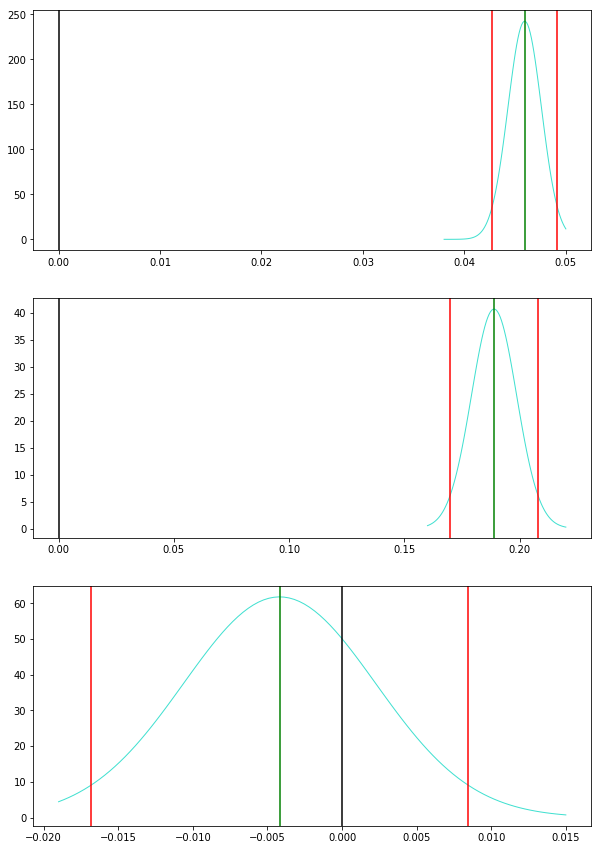

In [31]:
b1_upper=lm.coef_[0]+math.sqrt(sigma_sq*cov_b1)*1.96
b1_lower=lm.coef_[0]-math.sqrt(sigma_sq*cov_b1)*1.96
b2_upper=lm.coef_[1]+math.sqrt(sigma_sq*cov_b2)*1.96
b2_lower=lm.coef_[1]-math.sqrt(sigma_sq*cov_b2)*1.96
b3_upper=lm.coef_[2]+math.sqrt(sigma_sq*cov_b3)*1.96
b3_lower=lm.coef_[2]-math.sqrt(sigma_sq*cov_b3)*1.96
print(b1_upper,b1_lower,b2_upper,b2_lower,b3_upper,b3_lower)
a = np.linspace(0.038,0.05,100)
b = np.linspace(0.16,0.22,100)
c = np.linspace(-0.019,0.015,100)

fig = plt.figure(figsize=(10, 15))
ax1=plt.subplot(3, 1, 1)
ax1.plot(a,mlab.normpdf(a, lm.coef_[0], math.sqrt(sigma_sq*cov_b1)),color='turquoise',linewidth=1)
ax1.axvline(lm.coef_[0],color='g')
ax1.axvline(x=b1_upper,color='r')
ax1.axvline(x=b1_lower,color='r')
ax1.axvline(x=0,color='k')
ax2=plt.subplot(3, 1, 2)
ax2.plot(b,mlab.normpdf(b, lm.coef_[1], math.sqrt(sigma_sq*cov_b2)),color='turquoise',linewidth=1)
ax2.axvline(lm.coef_[1],color='g')
ax2.axvline(x=b2_upper,color='r')
ax2.axvline(x=b2_lower,color='r')
ax2.axvline(x=0,color='k')
ax3=plt.subplot(3, 1, 3)
ax3.plot(c,mlab.normpdf(c, lm.coef_[2], math.sqrt(sigma_sq*cov_b3)),color='turquoise',linewidth=1)
ax3.axvline(lm.coef_[2],color='g')
ax3.axvline(x=b3_upper,color='r')
ax3.axvline(x=b3_lower,color='r')
ax3.axvline(x=0,color='k')

In general, the red lines are confidence intervals of each $\beta$, green lines are $\mu$ of each $\beta$, black lines are the zero value. We can see the first and second coefficient are not likely to be $0$, but the third coefficicent are very likely to be $0$.

In [32]:
print(math.sqrt(sigma_sq*cov_b1),math.sqrt(sigma_sq*cov_b2),math.sqrt(sigma_sq*cov_b3))

0.0016452768796490563 0.009797710547001305 0.0064512233978856045


In [33]:
import scipy, scipy.stats
import statsmodels.api as sm
result = sm.OLS( y, X ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           1.58e-96
Time:                        16:24:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
intercept      2.9389      0.312      9.422      0.000       2.324       3.554
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see our output of std.devs are the same with the fit code, thus the variances should be the same.

Also, the null hypothesis test returns the same result, which is $\beta_1,\beta_2\neq 0$, and $\beta_3$ could be $0$ as we showed.

**[10 points]** h) Repeat the steps above but **build a seperate model for each individual feature**, ie. `X = df[col]` where `col` is one of the variables TV, radio and newspaper. Based on this analysis, which feature now appears to have more of an influence on sales? Which has practically none? Provide an interpretation of this apparent contradiction. 

**Hint:** It may be useful to check the correlation matrix using `df.corr()` and to understand how the covariates relate to one another. 

In [38]:
X1=df.drop(['sales','radio','newspaper'], axis=1)
X1['intercept']=1
X2=df.drop(['sales','TV','newspaper'], axis=1)
X2['intercept']=1
X3=df.drop(['sales','radio','TV'], axis=1)
X3['intercept']=1
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [35]:
result = sm.OLS( y, X1 ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           1.47e-42
Time:                        16:24:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0475      0.003     17.668      0.000       0.042       0.053
intercept      7.0326      0.458     15.360      0.000       6.130       7.935
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result = sm.OLS( y, X2 ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           4.35e-19
Time:                        16:24:21   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radio          0.2025      0.020      9.921      0.000       0.162       0.243
intercept      9.3116      0.563     16.542      0.000       8.202      10.422
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
result = sm.OLS( y, X3 ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 07 Mar 2019   Prob (F-statistic):            0.00115
Time:                        16:24:22   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
intercept     12.3514      0.621     19.876      0.000      11.126      13.577
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on our $3$ results, we can see the most affect is come from radio, since the coefficient is $0.2025$, which is the highest. When we check the $P$ value, we can see all $P$ value are small so that we can reject the null hypothesis of all individual factor, this implies that they will not be zero. This may coused by the the correlation between newspaper and other two factors.

**[10 points]** i) (synnergetic effects) Try plotting the data in three dimensions along with the hyperplane solution to see where the solution you have stops following the linear trend, and see if you can infer
a new variable which will help, which is a product of two of our current variables.  More precisely, our previous model has been:

$$ y = \beta_0 x_{0} +  \beta_0 x_{1} +  \beta_0 x_{2} + \epsilon.$$

See if you an introduce a new term $$ \beta_{ij} x_i x_j$$ for some j using your intuition from the previous problems.

What is your interpretation of this result?

** Hint: The code below can be adopted to make your 3d plot.**

Text(0.5, 0, 'sales')

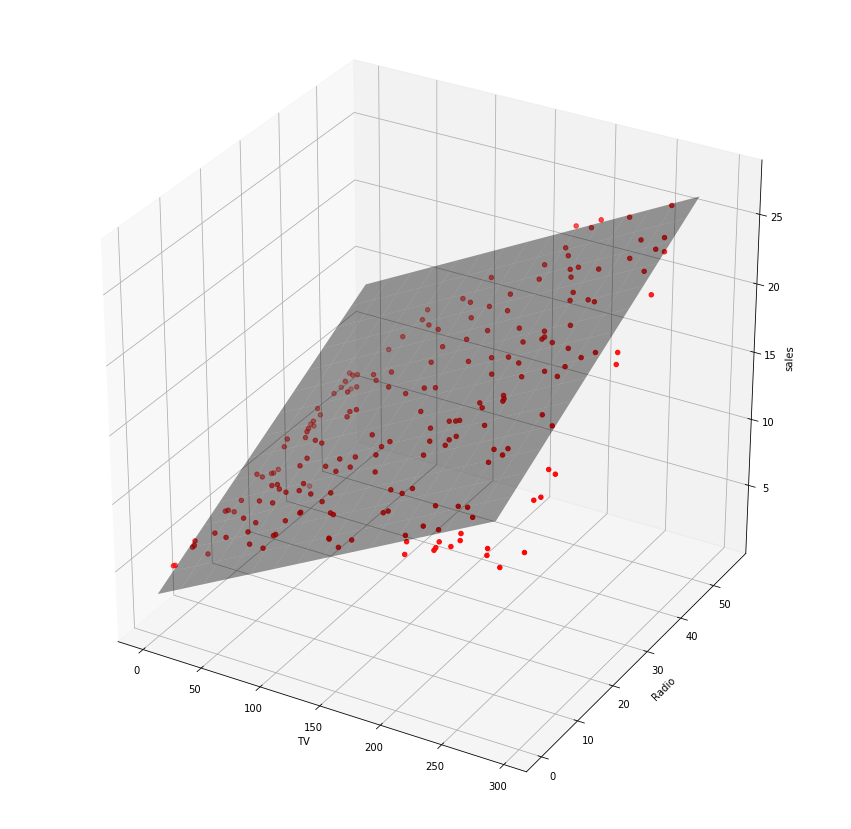

In [39]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 300, 20)
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

new_x = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
# define your regr_1
regr_1 = LinearRegression()
regr_1.fit(X[["TV","radio"]], y)
predict_sales = regr_1.predict(new_x)
ax.plot_surface(x_surf, y_surf,
                predict_sales.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(X['TV'], X['radio'], y, c='r', marker='o')

ax.set_xlabel('TV')
ax.set_ylabel("Radio")
ax.set_zlabel('sales')

# Code version 2

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

#csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#model = sm.ols(formula='sales ~ TV + radio', data = csv)
#fit = model.fit()

#fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.linspace(csv['TV'].min(), csv['TV'].max(), 100)                # generate a mesh
y_surf = np.linspace(csv['radio'].min(), csv['radio'].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                np.array(out).reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.title("Sales ~ TV + Radio")
plt.show()

Based on the covariance matrix, we can see the covariacne between raido and newspaper are the largest. So we build the new variable with radio and newspapaer.

In [41]:
new_var = numpy.zeros(X.shape[0])
for i in range(X.shape[0]):
    new_var[i] = X["radio"][i+1] * X['newspaper'][i+1]
X_new = X
X_new['radio_newspaper'] = new_var
output = sm.OLS(y, X_new).fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     426.6
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           3.25e-95
Time:                        16:25:48   Log-Likelihood:                -385.95
No. Observations:                 200   AIC:                             781.9
Df Residuals:                     195   BIC:                             798.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
TV                  0.0458      0.001     32.746      0.000       0.043       0.049
radio               0.1801      0.015     11.930      0.000       0.150       0.210
newspaper          -0.0094      0.014     -0.688      0.492      -0.036       0.018
intercept           3.1467      0.437      7.193      0.000       2.284       4.009
radio_newspaper     0.0003      0.000      0.678      0.498      -0.001       0.001
==============================================================================
Omnibus:                       60.978   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.663
Skew:                          -1.344   Prob(JB):                     1.17e-33
Kurtosis:                       6.313   Cond. No.                     4.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see the new variable does't affect the previous model very much, and it is not significant.

**[5 points]** h) Does your mixed variable in i) imporve performance? Why?

Compare with the previous out put, we can see it doesn't improve much. The reason might be the provious modle already count the factor of radio and newspaper, adding a new variable with the product of them may not affect the modle. If we drop radio and newspaper and add the new factor which is (radio_newspaper), then the model might perform well.

## Problem 4: Regularization and model selection

We had quite a hard time discovering the variables which had true predictive power in the previous section. What if we pnealized
the size of the coefficients in order to select the most predictive features?

Let $$ F_{\alpha}^p(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}^{(i)})^2 + \alpha \|\beta\|_{L^p}^p.$$

We call $F_{\alpha}^p$ to be the *Lasso* norm when $p=1$ and *Ridge* norm when $p=2$. 

** [5 points] ** a) First rescale you features to have mean zero and unit variance using


```from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
y_scaled = y - np.mean(y)```

In [42]:
from sklearn import preprocessing

In [43]:
X = df[['TV','radio','newspaper']]
X_scaled = preprocessing.scale(X)
y_scaled = y - numpy.mean(y)

** [5 points] ** a) Repeat the regression above, but using `sklearn`'s `Lasso()` method with $\alpha=0$ on the new scaled features. Notice you may obtain a warning. Can you explain what the warning about convergence of the gradient descent method may mean?

In [44]:
import sklearn

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=numpy.random)
clf = sklearn.linear_model.Lasso(alpha = 0)
clf.fit(X_train,y_train)
clf.coef_

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 3.94206359,  2.71249489, -0.0358693 ])

The warning says this algorithm doesn't converge. This is beacuse the converge rate is too solw so that it stops before it converge(number of iterations is not enough).

** [10 points] ** b) Choose a range of $\alpha$ ranging from 0 to 1. Why does the $R^2$ score on test data seem to increase then decrease again?
Plot the $R^2$ on test data as you vary $\alpha$. 

**Note:** Because of the randomness, you may need to experiment a bit with replacing 1 by smaller or lower numbers. The goal is to find a concave region. Also, to create a collection of  uniformly distributed points from 0 to 1, you can use:

```import numpy as np
alphas = np.linspace(0,1,num_samples)
```

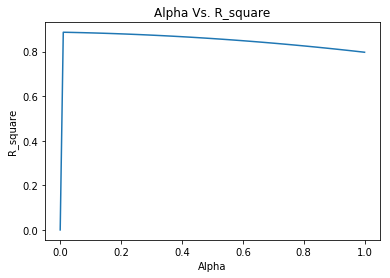

In [46]:
import numpy

fig = plt.figure()
axe = fig.add_subplot(1,1,1)

N = 100
alphas = numpy.linspace(0,1,N)
r = numpy.zeros(N)
for i in range(1,N):
    clf = sklearn.linear_model.Lasso(alpha = alphas[i])
    clf.fit(X_train,y_train)
    r[i] = clf.score(X_test,y_test)

axe.plot(alphas,r)  
axe.set_title("Alpha Vs. R_square")
axe.set_xlabel("Alpha")
axe.set_ylabel("R_square")
plt.show()

At the start, the model perform better, since we penalized the noise and the noise decreased. As $\alpha$ increasing, the penalty is also increasing, so that the prediction of our modle will become worse and worse.

**[10 points]** c) Choose the *best* $\alpha$ from part b) (you can use `alphas[np.argmax(scores)]`). What is your new score on test data? (it may not change much) What are the coefficients for this model and how do they compare as $\alpha$ ranges from close to $0$ to larger values?

best alpha score:  0.8868034297435914
best alpha coefficients:  [ 3.93256835  2.69606258 -0.01772678]


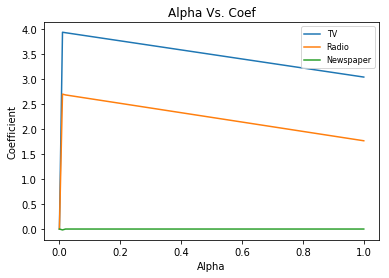

In [47]:
best_alpha = alphas[numpy.argmax(r)]

clf = sklearn.linear_model.Lasso(alpha = best_alpha)
clf.fit(X_train,y_train)
print("best alpha score: ",clf.score(X_test,y_test))
print("best alpha coefficients: ",clf.coef_)

fig = plt.figure()
axe = fig.add_subplot(1,1,1)

N = 100
alphas = numpy.linspace(0,1,N)
beta_TV = numpy.zeros(N)
beta_radio = numpy.zeros(N)
beta_newspaper = numpy.zeros(N)

for i in range(1,N):
    clf = sklearn.linear_model.Lasso(alpha = alphas[i])
    clf.fit(X_train,y_train)
    beta_TV[i]  = clf.coef_[0]
    beta_radio[i]= clf.coef_[1]
    beta_newspaper[i]= clf.coef_[2]

axe.plot(alphas,beta_TV,label = "TV") 
axe.plot(alphas,beta_radio,label = "Radio")  
axe.plot(alphas,beta_newspaper,label = "Newspaper")  
axe.set_title("Alpha Vs. Coef")
axe.set_xlabel("Alpha")
axe.set_ylabel("Coefficient")
axe.legend(loc=1,prop={'size': 8})
plt.show()

Score is $0.8868$, coefficients are $3.93,2.69,-0.018$

**[10 points]** d) Experiment with different values of $\alpha$ in part b) but now using `Ridge()`? How do the coefficients vary as you vary $\alpha$ in the `Ridge` method? 

How do you explain the difference between this observation and the solution in part c) based on the level sets of $L^p$ for $p=1$ and $p=2$.

In [48]:
N = 100
alphas = numpy.linspace(0,1,N)
r = numpy.zeros(N)
beta_TV = numpy.zeros(N)
beta_radio = numpy.zeros(N)
beta_newspaper = numpy.zeros(N)
clf.coef_

array([3.03679439, 1.7637979 , 0.        ])

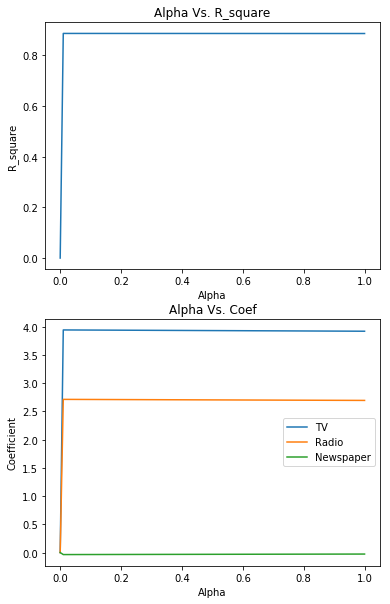

In [49]:
fig = plt.figure()
fig.set_figheight(fig.get_figheight() * 2.5)
for i in range(1,N):
    clf = sklearn.linear_model.Ridge(alpha = alphas[i])
    clf.fit(X_train,y_train)
    r[i] = clf.score(X_test,y_test)
    beta_TV[i]  = clf.coef_[0]
    beta_radio[i]= clf.coef_[1]
    beta_newspaper[i]= clf.coef_[2]
axe = fig.add_subplot(2,1,1)
axe.plot(alphas,r)  
axe.set_title("Alpha Vs. R_square")
axe.set_xlabel("Alpha")
axe.set_ylabel("R_square")

axe = fig.add_subplot(2,1,2)
axe.plot(alphas,beta_TV,label = "TV") 
axe.plot(alphas,beta_radio,label = "Radio")  
axe.plot(alphas,beta_newspaper,label = "Newspaper")  
axe.set_title("Alpha Vs. Coef")
axe.set_xlabel("Alpha")
axe.set_ylabel("Coefficient")
axe.legend()

plt.show()

Lasso method uses  L1 norm to penalize the coefficients, Rdige uses L2 norm to penalize the coeficients. We can see model is more sensative to the data with L2 norm.

**[5 points]** Did we need to rescale in part a)? Why would our solution not make sense otherwise?

Yes. We need to standardize the magnitude of the variables, otherwise we will penalize more on the variables with larger coefficients, and this will make out model perform bad.

## Problem 5:  Gradient Descent and the learning rate

**[10 points]** a) By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

With learning rate $0.0001$:

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.02963934787473239, m = 1.4774173755483797, error = 112.65585181499746


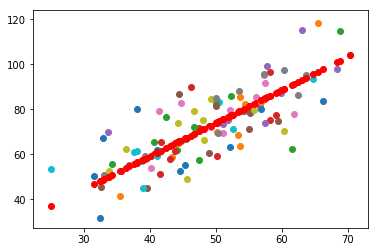

In [50]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    
run(10)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


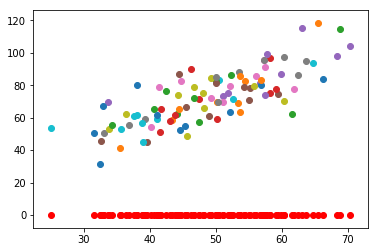

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


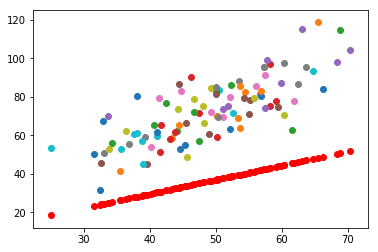

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


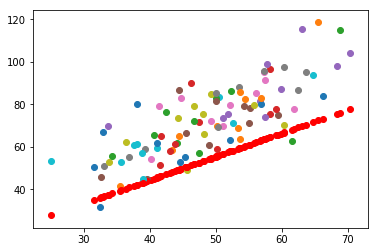

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


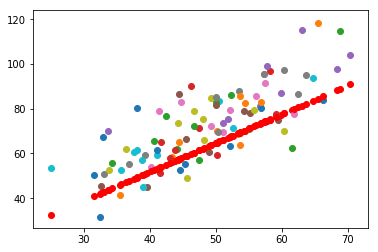

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


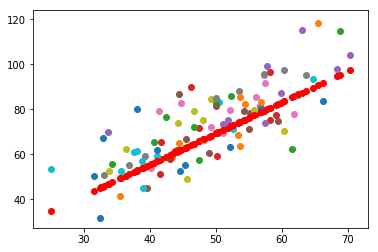

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


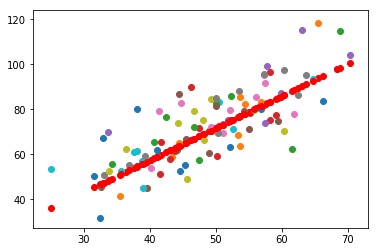

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


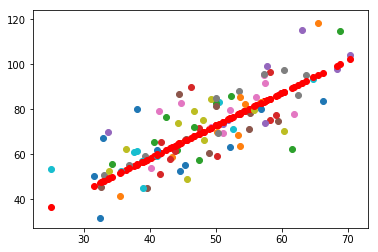

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


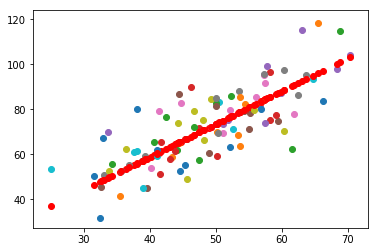

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


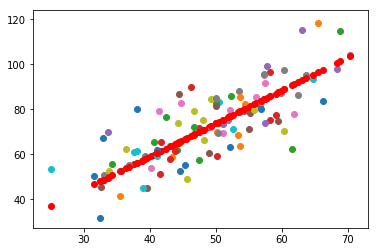

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


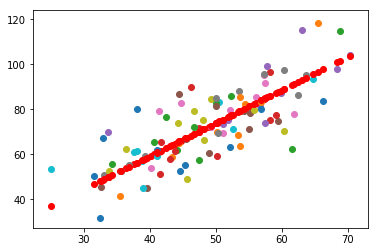

In [51]:
for num in range(0,10):
    run(num)
    plt.show()

With learning rate $0.00041$:

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = -0.01291391037242054, m = -0.7824290644920096, error = 12859.982778340214


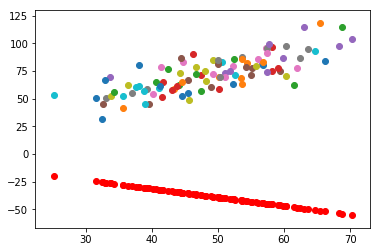

In [52]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.00041
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    
run(10)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


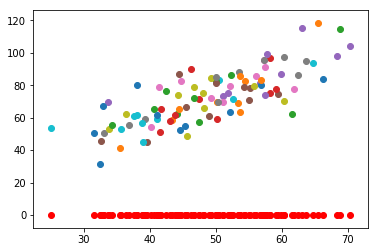

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.05964274145402291, m = 3.0219882191723313, error = 6048.391912264637


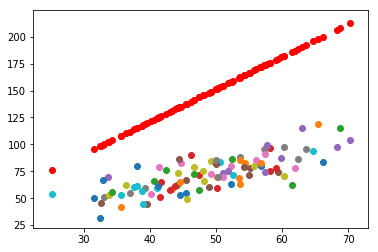

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.0020836796641264116, m = -0.13109537121947934, error = 6574.512391299633


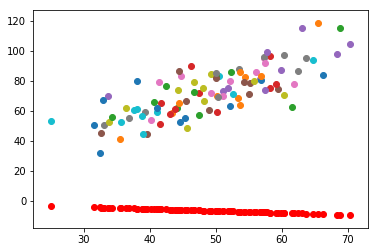

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.06282370420473948, m = 3.158750354079386, error = 7147.266120674546


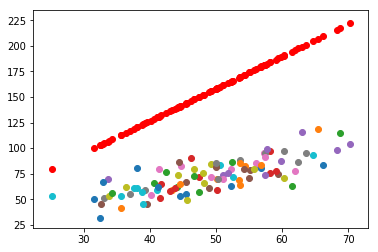

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -0.004395756088694414, m = -0.2738096582892031, error = 7770.78648715317


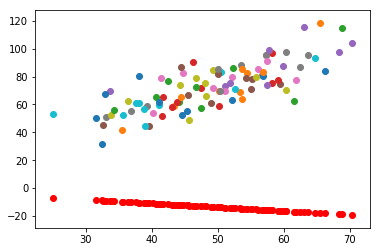

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.06624290861703767, m = 3.307635402438555, error = 8449.573244544663


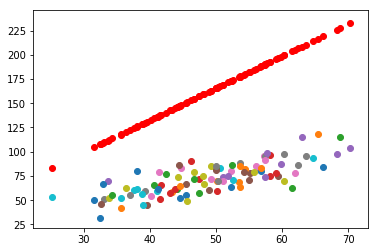

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -0.006956470753607238, m = -0.4291727159828289, error = 9188.52498702857


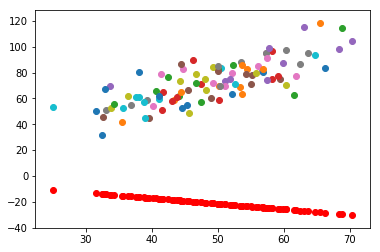

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.06992147419399282, m = 3.4697178912700855, error = 9992.974500786962


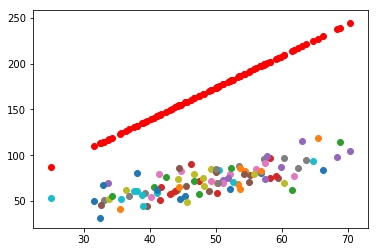

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -0.00978785926361106, m = -0.5983056813256269, error = 10868.727249065116


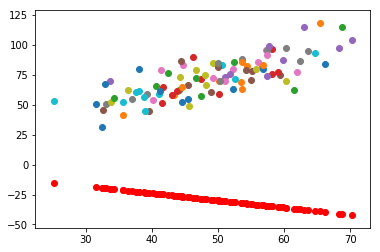

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.0738823923876874, m = 3.6461675894169847, error = 11822.103268396037


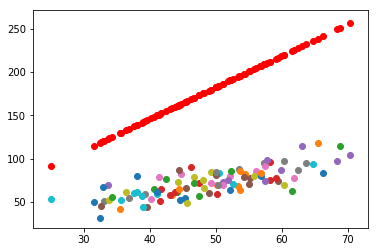

In [53]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()


Based on these graph, with laerning rate $0.00041$, we can see the gradients are shifting between positive and negative, and the absult value of gradient is increasing. This indicate divergence but not convergence.

In general, converge rate has positive relationship with learning rate, the small the learning rate, the slower the convergence will be.(I can explain this based on the graphs below)

b) **[10 points]** Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

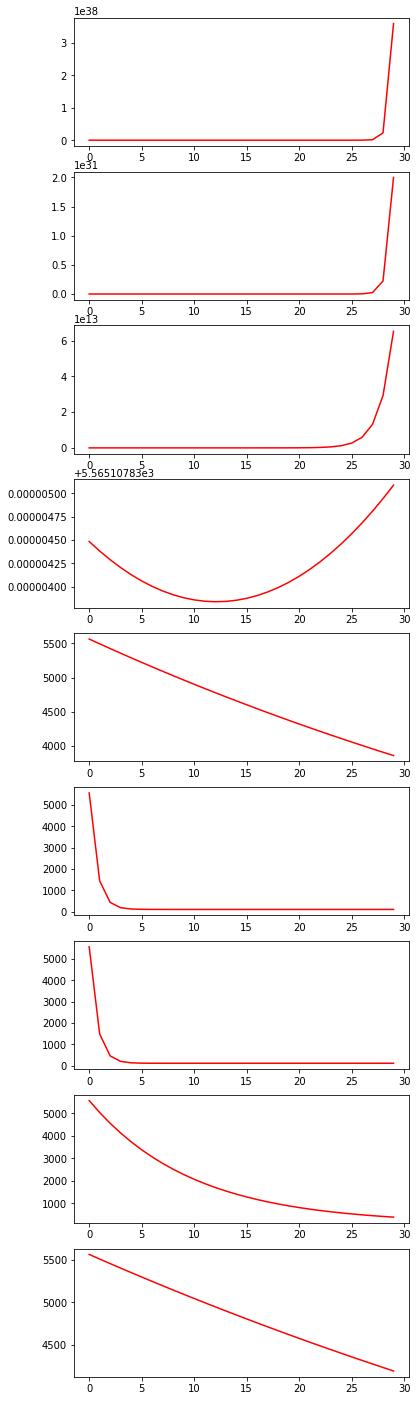

In [54]:
fig = plt.figure(figsize=(6, 25))
Rate = [0.001,0.0008,0.0005,0.0004012964389,0.0004,0.0003,0.0001,0.00001,0.000001]
for j in range(len(Rate)):
    N=30
    List = []
    Error = []
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = Rate[j]
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    for i in range(0,N):
        List=List+[int(i)]
        num_iterations = i
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        Error= Error+[compute_error_for_line_given_points(b, m, points)]

    p1=plt.subplot(len(Rate), 1, j+1)
    p1.plot(List,Error,color='r')
plt.show()

These graphs are 'Error' vs. 'Numbers of iteration'. Based on the output, we can see the rate $0.0004012964389$ is a shifting point for the whole system. If the 'Learning rate' is below this number, the error will approach to zero, which indicates the system is converging. Also, converging bacome slower for lower 'Learning rate'(see last two graphs), this is beacuse the number of iteration, N, is not enough to approach the final result, we can simply increase the number of N to approach the final result(But it will cost more in calculation). If the 'Learning rate' is above this number, then the error will be incresing, which indicats the system is diverging.

# Problem 6 : Computing to Problem 2 via gradient descent. 

Let 

$$ \hat F(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}_i)^2 = \frac{1}{N}\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2, $$

where $(\mathbf{x}_i, y_i)$ are as in Problem 2. 


**[10 points]** a) Solve $\nabla \hat F(\beta) = 0$ for $\beta$ in terms of $\mathbf{X}$ and $\mathbf{y}$ and show that the solution is

$$ \beta = (\mathbf X^T\mathbf X)^{-1} \mathbf X \mathbf y. $$

*Hint:*
Use the product rule for inner products afer rewriting

$$\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2  = \langle \mathbf{y} - \mathbf{X} \beta, \; \mathbf{y} - \mathbf{X} \beta \rangle. $$


**[5 points]** b)  What assumption did you have to make to solve for $\beta$ in in part a)? 

a)

$\nabla \hat F(\beta) = \nabla \frac{1}{N}\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2 = 0$


$\begin{align}
&\nabla \langle \mathbf{y} - \mathbf{X} \beta, \; \mathbf{y} - \mathbf{X} \beta \rangle\\
&= \nabla (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta)\\
&=\nabla (\mathbf{y}^T - \beta^T\mathbf{X}^T)(\mathbf{y} - \mathbf{X} \beta)\\
&=\nabla \left (\mathbf{y}^T\mathbf{y}- \beta^T\mathbf{X}^T\mathbf{y} - \mathbf{y}^T\mathbf{X} \beta  +\beta^T\mathbf{X}^T \mathbf{X} \beta\right)\\
\end{align}$


Let $\frac{1}{N}\nabla \left (\mathbf{y}^T\mathbf{y}-  \beta^T\mathbf{X}^T\mathbf{y} - \mathbf{y}^T\mathbf{X} \beta  +\beta^T\mathbf{X}^T \mathbf{X} \beta\right) = 0$


$\begin{align}
\nabla \left (\mathbf{y}^T\mathbf{y}- \beta^T\mathbf{X}^T\mathbf{y} - \mathbf{y}^T\mathbf{X} \beta  +\beta^T\mathbf{X}^T \mathbf{X} \beta\right) &= 0\\
-\mathbf{X}^T \mathbf{y}-\mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T \mathbf{X}\beta  &= 0\\
\mathbf{X}^T \mathbf{X}\beta  &= \mathbf{X}^T \mathbf{y}\\
\beta &= (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}
\end{align}$

b)

The assumption is $\beta$ is not a scalar.

**[10 points]** c) Let $\beta_0 = (0, 0, 0)$ and $\nu =0.01$. Using your computation of $\nabla F(\beta)$ from a), write a function in Python which iterates

$$\beta_t = \beta_{t-1} - \nu \nabla \hat F(\beta_{t-1})$$ from $t=0,...,T$ for the original, unscaled variables $X,y$.  Are you having trouble with convergence? If so, consider more iterations and a much smaller learning rate. Why do you think we had to do this in this case? 

In [55]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X=df.drop(['sales'], axis=1)
y=df.sales

In [56]:
X1 = df[['TV','radio','newspaper']]
Xv = X1.values
yv = y.values
N = X1.shape[0]

v = 0.01
max_step = 1000
L = numpy.zeros(3)

for i in range(max_step):
    gradient = (-2.0)*numpy.dot(numpy.transpose(Xv),yv)
    gradient1 = gradient + 2.0*numpy.dot(numpy.transpose(Xv),Xv).dot(L)
    gradient2 = gradient1 / N
    new = L - v * gradient2
    L = new
if numpy.linalg.norm(L-new) < 0.000001:
    print("Converge, beta = ", new)
else:
    print("DIverge")

DIverge


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


In [57]:
X1 = df[['TV','radio','newspaper']]
Xv = X1.values
yv = y.values
N = X1.shape[0]

v = 0.00001
max_step = 10000
L = numpy.zeros(3)

for i in range(max_step):
    gradient = (-2.0)*numpy.matmul(numpy.transpose(Xv),yv)
    gradient1 = (gradient + 2.0*numpy.matmul(numpy.transpose(Xv),Xv).dot(L))/N
    new = L - v * gradient1
    L = new
if numpy.linalg.norm(L-new) < 0.000001:
    print("Converge, beta = ", L)
else:
    print("DIverge")

Converge, beta =  [0.05379188 0.22222731 0.01681639]


At first, with $v=0.1$ and $n=1000$, we can see the $\beta$ values are diverging. After we modify $v=0.00001$ and $n=10000$(with smaller learning rate and more iterations), we can see it's finally converging. This is beacuse we didn't scale the features of our modle so it can't perform well.

**[10 points]** d) Repeat part c) but for your scaled features. Do you notice that you can obtain convergence with a lower number
of iterations and higher learning rate? Explain why rescaling your features could have this impact. 

In [59]:
X1 = df[['TV','radio','newspaper']]
X_scaled = preprocessing.scale(Xv)
y_scaled = y - numpy.mean(yv)
N = X1.shape[0]

v = 0.01
max_step = 10000
L = numpy.zeros(3)

for i in range(max_step):
    gradient = (-2.0)*numpy.matmul(numpy.transpose(X_scaled),y_scaled)
    gradient1 = (gradient + 2.0*numpy.matmul(numpy.transpose(X_scaled),X_scaled).dot(L))/N
    new = L - v * gradient1
    L = new
if numpy.linalg.norm(L-new) < 0.000001:
    print("Converge, beta = ", new)
else:
    print("DIverge")


Converge, beta =  [ 3.91925365  2.79206274 -0.02253861]


Rescaling standardize the magnitudes of each variable, the number of iterations which need to be converge is getting smaller(and we can use larger learning rate). Rescaling can let the model treat large and small data in the same scale, this rule out the influence of the magnitudes of different data.

**[10 points]** e) Using the starter code below, show what happens to the coefficients you obtain from gradient descent as `corr` increases from `0` to `0.97`. Explain based on what
you know about how stability relates to correlation.

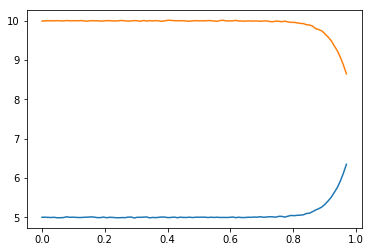

In [60]:
def grad(X, y, beta):
    df = 2*(-X.T.dot(y) + X.T.dot(X).dot(beta))
    return df

def gradflow(X,y,beta0,nu=0.00001):
    beta = beta0
    for k in range(100):
        beta = beta - nu*grad(X,y,beta)
    return beta

mean = (0,0)
betas = []
C = linspace(0,0.97,100)
for corr in C:
    cov = [[1, corr],[corr,1 ]]
    X = numpy.random.multivariate_normal(mean, cov, 10000)
    y = 5*X[:,0] + 10*X[:,1] + numpy.random.normal(0,0.5,10000)
    beta_solution = gradflow(X,y,[3,3])
    betas.append(beta_solution)
plt.plot(C,betas)
plt.show()

As correlation increase, higher $\beta$ value start to decrease and lower $\beta$ value start to increase. They are converging to each other and finally achieve the same value.